<a href="https://colab.research.google.com/github/1900690/heatmap_yolo/blob/main/heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#セットアップ

Pip で `ultralytics` と [依存関係](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml)をインストールし、ソフトウェアとハードウェアをチェックする。

In [1]:
%pip install ultralytics
import ultralytics

ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


#ヒートマップ入門
 [Ultralytics YOLO11](https://docs.ultralytics.com/ja/guides/heatmaps/#introduction-to-heatmaps)によって生成されるヒートマップは、複雑なデータを色分けされた鮮やかなマトリックスに変換します。この視覚化ツールは、様々なデータ値を色のグラデーションで表現し、暖かい色ほど値が高く、冷たい色ほど値が低いことを示します。ヒートマップは、複雑なデータのパターン、相関関係、異常値を視覚的に捉えやすく、様々な分野におけるデータの解釈をより直感的かつ魅力的に行うための有効な手段です。

## 実世界での応用

|                                                                 交通                                                                  |                                                                 流通                                                                  |
|:-----------------------------------------------------------------------------------------------------------------------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|
| ![Ultralytics YOLO11 Transportation Heatmap](https://github.com/RizwanMunawar/ultralytics/assets/62513924/288d7053-622b-4452-b4e4-1f41aeb764aa) | ![Ultralytics YOLO11 Retail Heatmap](https://github.com/RizwanMunawar/ultralytics/assets/62513924/edef75ad-50a7-4c0a-be4a-a66cdfc12802) |
|                                                    Ultralytics YOLO11 Transportation Heatmap                                                    |                                                    Ultralytics YOLO11 Retail Heatmap                                                    |


#動画で分析

In [ ]:
import cv2

from ultralytics import solutions

# Open video file
cap = cv2.VideoCapture("path/to/video/file.mp4")
assert cap.isOpened(), "Error reading video file"

# Get video properties
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# Initialize video writer
video_writer = cv2.VideoWriter("heatmap_output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Initialize heatmap object
heatmap_obj = solutions.Heatmap(
    colormap=cv2.COLORMAP_PARULA,  # Color of the heatmap
    show=True,  # Display the image during processing
    model="yolo11n.pt",  # Ultralytics YOLO11 model file
)

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    # Generate heatmap on the frame
    im0 = heatmap_obj.generate_heatmap(im0)

    # Write the frame to the output video
    video_writer.write(im0)

# Release resources
cap.release()
video_writer.release()
cv2.destroyAllWindows()

#画像

In [3]:
#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math


#すでにフォルダがある場合は消す
if os.path.exists("/content/datasets"):
  shutil.rmtree("/content/datasets")

#データをアップロード
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)


Saving syakuyaku500_20250110181608.zip to syakuyaku500_20250110181608.zip


In [6]:
%pip -q install YOLOv8-Explainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38303 sha256=ea4c303d33bf9c516462df7e9b9889cc8fcd72daca6f610e6782444fad83f40f
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


YOLO11x summary: 631 layers, 56,876,086 parameters, 0 gradients, 195.5 GFLOPs


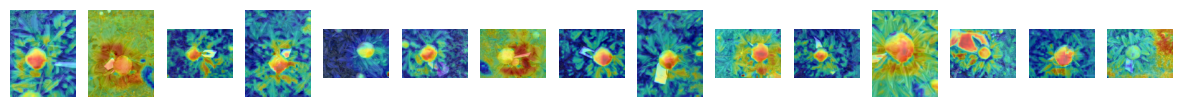

In [7]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight="/content/yolo11x.pt",
        conf_threshold=0.4,
        #device = "cpu",
        method = "EigenCAM",
        layer=[10, 12, 14, 16, 18, -3],
        #backward_type="all",
        ratio=0.02,
        show_box=False,
        renormalize=False,
)

imagelist = model(
    img_path="/content/original",
    )

display_images(imagelist)